In [1]:
#Credit Card fraud detection usin Randomforest classifier model

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Load the data
data = pd.read_csv(r"C:\Users\mdosa\Downloads\creditcard\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [30]:
#Checking if there are any null values
print("Null values per column:\n", data.isnull().sum())
#Shuffling the data
data = shuffle(data,random_state=42)

Null values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [31]:
#Separating the Features and target
X = data.drop('Class',axis = 1)
Y = data['Class']

In [32]:
#Train,Test,Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42,stratify = Y)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:",X_test.shape)

Training Data Shape: (227845, 30)
Testing Data Shape: (56962, 30)


In [33]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Random Forest Model Training
model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 18,
    min_samples_split = 4,
    min_samples_leaf = 2,
    class_weight = "balanced",
    random_state = 42)
print("Training model")
model.fit(X_train_scaled,Y_train)
print("Model Trained Successfully...")

Training model
Model Trained Successfully...


In [37]:
Y_pred = model.predict(X_test_scaled)

In [40]:
#Evaluation
accuracy = accuracy_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
print("\nThe Performance of the model")
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1 Score: ",f1)
print("\nClassification Report:\n",classification_report(Y_test,Y_pred))



The Performance of the model
Accuracy:  0.9995259997893332
Recall:  0.8061224489795918
Precision:  0.9080459770114943
F1 Score:  0.8540540540540541

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<function matplotlib.pyplot.show(close=None, block=None)>

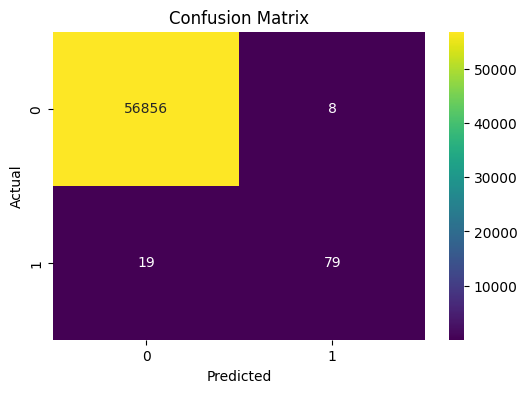

In [54]:
#CONFUSION MATRIX
con = confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(con,annot = True,fmt='d',cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

In [75]:
def predict(inp_features):
    # Scale the input features
    inp_scaled = scaler.transform([inp_features])

    # Predict using the trained model
    prediction = model.predict(inp_scaled)

    # Return label based on predicted class
    return "Fraudulent" if prediction[0] == 1 else "Legitimate"


In [80]:
sample1 = [406.0, -2.312226542, 1.951992011, -1.609850732, 3.997905587, -0.522187865,
-1.426545319, -2.537387306, 1.391657248, -2.770089279, -2.772272145,
3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412,
-1.14074718, -2.830055675, -3.132173355, -1.436424905, -2.187743107,
0.81272289, 0.616109459, -0.003602293, -0.562796875, -0.012398418,
-0.032128587, -0.24408654, 0.359744743, 0.00]
predict(sample1)

C:\Users\mdosa\anaconda3\envs\projects\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Fraudulent'

In [85]:
sample2 = [406.0, -2.312226542, 1.951992011, -1.609850732, 3.997905587, -0.522187865,
-1.426545319, -2.537387306, 1.391657248, -2.770089279, -2.772272145,
3.202033207, -2.899907388, -0.595221881, -4.289253782, 0.38972412,
-1.14074718, -2.830055675, -3.132173355, -1.436424905, -2.187743107,
0.81272289, 0.616109459, -0.003602293, -0.562796875, -0.012398418,
-0.032128587, -0.24408654, 0.359744743, 0.00]
predict(sample2)


C:\Users\mdosa\anaconda3\envs\projects\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Fraudulent'

In [86]:
sample3 = [0.0, 1.41796354547385, 0.863290650499394, -0.0103088796030824,
0.634046781318148, 0.35464904929194, 0.471800089419636,
0.381526361861484, -0.3925283943715, -0.627928508915435,
-0.606389481766347, 0.460503181631633, -0.558761699190108,
0.0257905801985591, -0.226487263835401, 0.178228225289747,
0.507756869957169, -0.28792374549456, -0.631418117709045,
-0.483284688099682, -0.208503797761478, 0.115576340848015,
0.336267023112913, 0.0220164301472295, -0.208253515234156,
-0.559824796253201, -0.0263976679330126, 0.0424220884435269,
-0.0188013670122269, 40.80]
predict(sample3)

C:\Users\mdosa\anaconda3\envs\projects\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Legitimate'